# Where Is the Quantumness in Quantum Computing?

Quantum Computing makes use of three quantum effects: superposition, interference, and entanglement.

We will focus on the gate model of quantum computing, where we compose circuits of gates to program a computation.

Several gates have been defined.  See https://en.wikipedia.org/wiki/Quantum_logic_gate

We will write code in Qiskit to examine how to create and utilize superposition, interference, and entanglement.


In [107]:
import numpy as np
from qiskit import Aer, BasicAer, ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.execute_function import execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

## Superposition

We can use the Hadamard gate, h, to create a superposition on the first qubit.

In [90]:
num_qubits = 2
num_cl_bits = 2

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.h(0)

qc.measure_all(num_qubits, num_cl_bits)

In [91]:
qc.draw()

┌───┐ ░ ┌─┐   
 q27_0: ┤ H ├─░─┤M├───
        └───┘ ░ └╥┘┌─┐
 q27_1: ──────░──╫─┤M├
              ░  ║ └╥┘
  c0_0: ═════════╬══╬═
                 ║  ║ 
  c0_1: ═════════╬══╬═
                 ║  ║ 
meas_0: ═════════╩══╬═
                    ║ 
meas_1: ════════════╩═

Now we can run the code on the simulator.

In [92]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'01 00': 525, '00 00': 475}


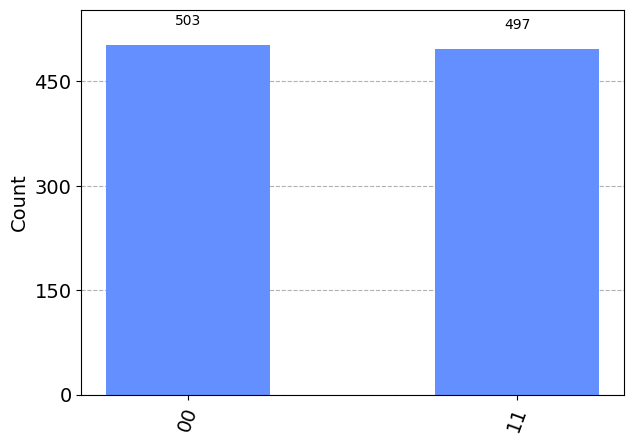

In [108]:
plot_histogram(counts)

In [110]:
num_qubits = 2
num_cl_bits = 2
qc = QuantumCircuit(num_qubits, num_cl_bits)

qc.h(0)

In [111]:
backend = BasicAer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

state_vector = result.get_statevector()

# Print the statevector for a 2-qubit state, (|00>, |01>, |10>, |11>)
print(state_vector)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


We can visualize a qubit's state on the Bloch Sphere.

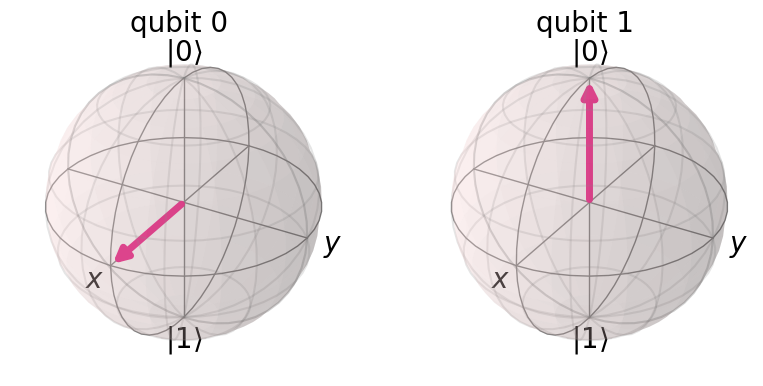

In [95]:
plot_bloch_multivector(state_vector)

## Interference

We can use interference to eliminate states in our circuit which will not represent the answer.

We can use an X gate, followed by a Hadamard gate to create a negative amplitude to setup for destructive interference.

In [96]:
qc.x(1)
qc.h(1)

backend = BasicAer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

state_vector = result.get_statevector()

# Print the statevector
print(state_vector)

[ 0.5+0.000000e+00j  0.5+0.000000e+00j -0.5-6.123234e-17j
 -0.5-6.123234e-17j]


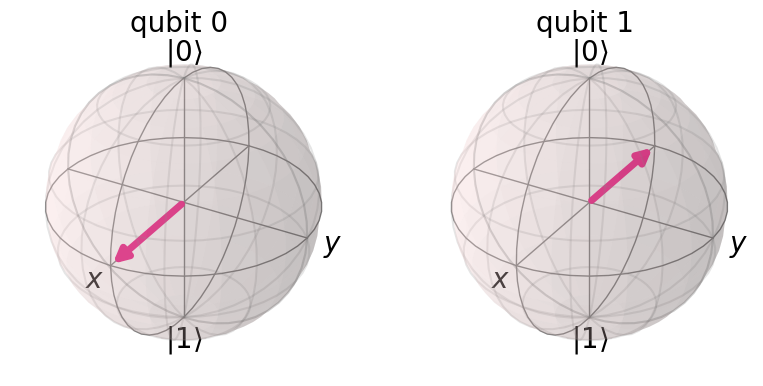

In [97]:
plot_bloch_multivector(state_vector)

In [99]:
qc.measure([0,1], [0,1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├─────┤M├───
     ├───┤┌───┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [100]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'00': 223, '01': 251, '10': 275, '11': 251}


## Entanglement 

We can entangle qubits in order to create correlations between the qubits.

In [103]:
num_qubits = 2
num_cl_bits = 2
qc = QuantumCircuit(num_qubits, num_cl_bits)

qc.h(0)
qc.cnot(0,1)

qc.measure([0,1], [0,1])

In [104]:
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [105]:
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'11': 497, '00': 503}


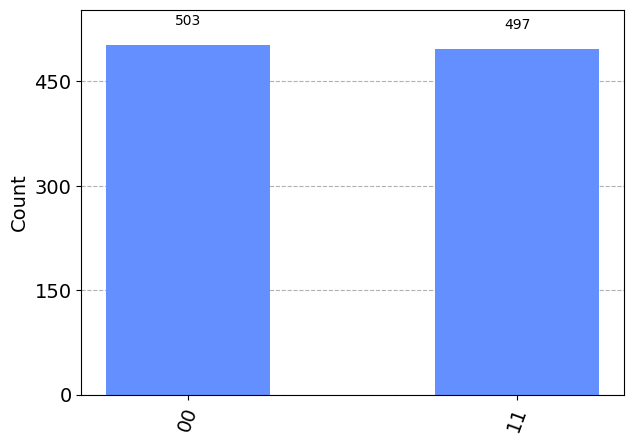

In [113]:
plot_histogram(counts)

# Appendix

## Visualization of Qubits

We can visualize the quantum state of a qubit by plotting it on the Bloch Sphere.

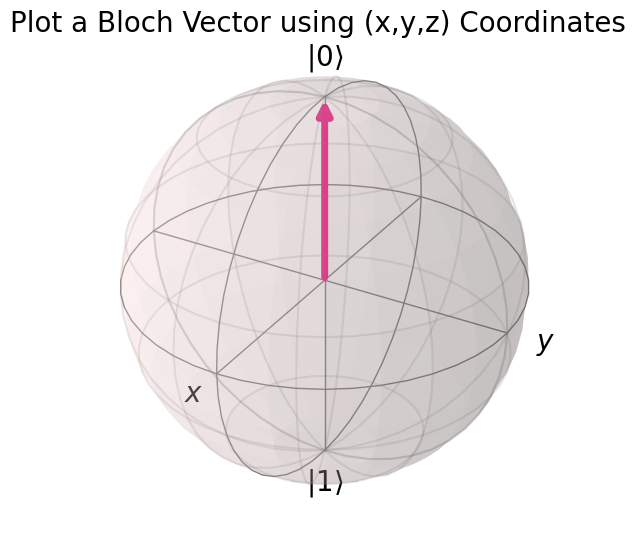

In [81]:
plot_bloch_vector([0, 0, 1],title='Plot a Bloch Vector using (x,y,z) Coordinates')

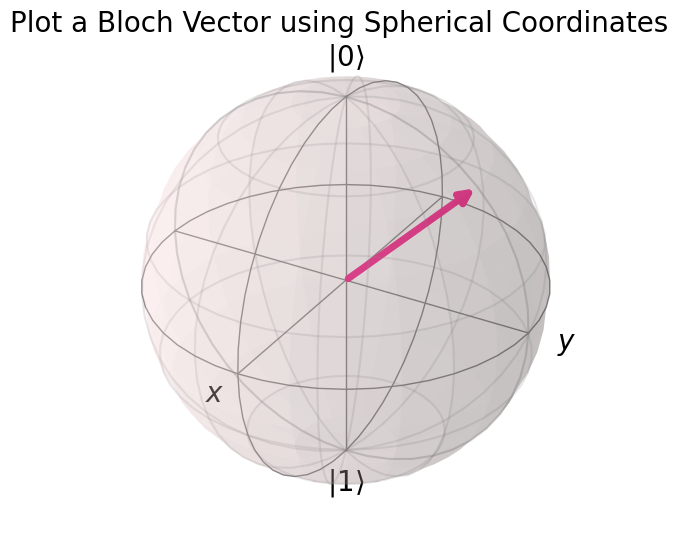

In [83]:
plot_bloch_vector([1, np.pi/4, np.pi/2],  #r=1, theta=np.pi/2, phi=np.pi/2
coord_type='spherical',
title='Plot a Bloch Vector using Spherical Coordinates')

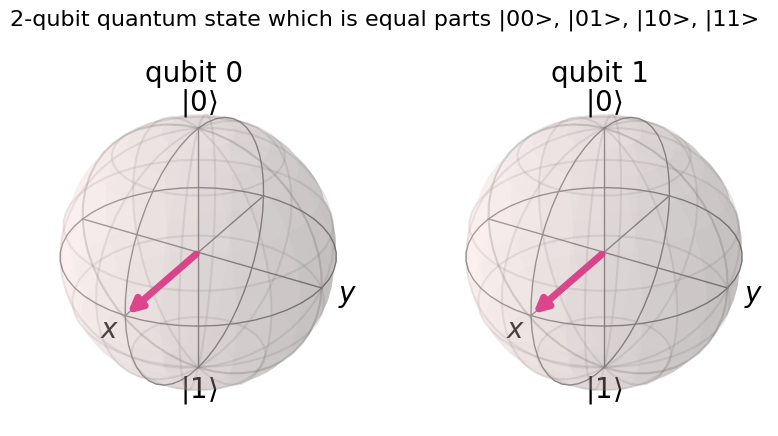

In [114]:
plot_bloch_multivector([0.5, 0.5, 0.5, 0.5], title="2-qubit quantum state which is equal parts |00>, |01>, |10>, |11>")